# Titanic Data

In [ ]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df=pd.read_csv('train.csv',)

In [ ]:
# The start of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Getting a rough idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Details Given
print("Number of Passengers are 891")
print("Mean Age of Passengers is 29")
print("Mean Fare of Tickets is around 32")

Number of Passengers are 891
Mean Age of Passengers is 29
Mean Fare of Tickets is around 32


Data Analysis

In [ ]:
# The columns and their titles
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

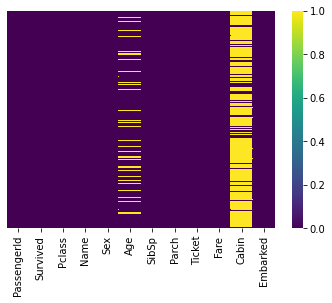

In [ ]:
sns.heatmap(df.isna(),cmap='viridis',yticklabels=False)

In [ ]:
# Number of null values in survive column
print(df['Survived'].isna().value_counts())
print(df['Survived'].value_counts())

False    891
Name: Survived, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [ ]:
print("Number of people that did'nt survive are",df['Survived'].value_counts()[0])
print("Number of people that survived are",df['Survived'].value_counts()[1])

Number of people that did'nt survive are 549
Number of people that survived are 342


In [ ]:
print(df['Pclass'].isna().value_counts())
print(df['Pclass'].value_counts())

False    891
Name: Pclass, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [ ]:
print("Number of 3rd class people: ",df['Pclass'].value_counts()[3])
print("Number of 2nd class people: ",df['Pclass'].value_counts()[2])
print("Number of 1st class people: ",df['Pclass'].value_counts()[1])

Number of 3rd class people:  491
Number of 2nd class people:  184
Number of 1st class people:  216


In [ ]:
print(df['Sex'].isna().value_counts())
print(df['Sex'].value_counts())

False    891
Name: Sex, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


In [ ]:
print("Number of Males is ",df['Sex'].value_counts()['male'])
print("Number of Females is ",df['Sex'].value_counts()['female'])

Number of Males is  577
Number of Females is  314


In [ ]:
print(df['Embarked'].isna().value_counts())
print(df['Embarked'].value_counts())

False    889
True       2
Name: Embarked, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Data Cleaning

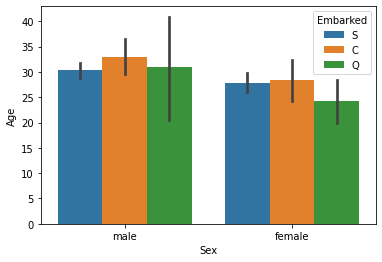

In [ ]:
sns.barplot(x='Sex',y='Age',hue='Embarked',data=df)

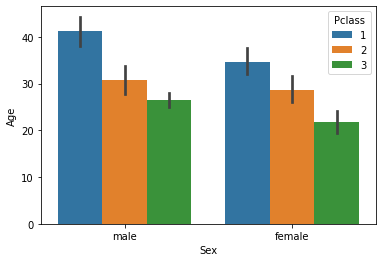

In [ ]:
# We can see here that higher passenger class can only be afforded by higher aged group since they have earned more
# Males around 40 and Females aroudn 35 have 1st class
sns.barplot(x='Sex',y='Age',hue='Pclass',data=df)

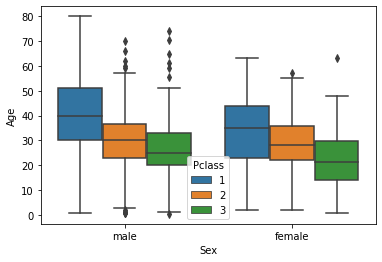

In [ ]:
sns.boxplot(x='Sex',y='Age',hue='Pclass',data=df)

In [ ]:
def convert2(cols):
  age=cols[0]
  pclass=cols[1]
  if pd.isnull(age):
    if pclass==1:
      return 39
    elif pclass==2:
      return 30
    else:
      return 27
  else:
    return age;

In [ ]:
# Based on the passenger class, assigning age to the missing values
df["Age"]=df[["Age","Pclass"]].apply(convert2,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


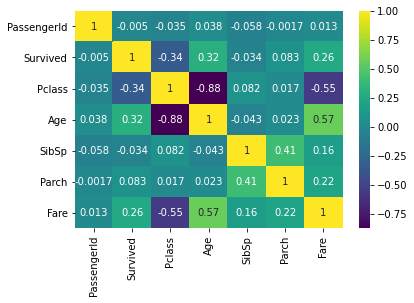

In [ ]:
# Plotting the correlation
sns.heatmap(df.corr(),annot=True,cmap='viridis')

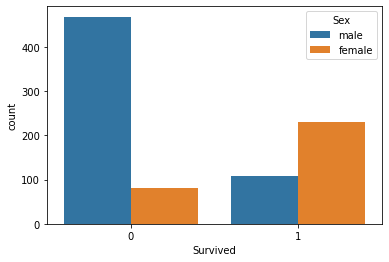

In [ ]:
# We can see that male did not survive whereas females survived more than males
sns.countplot(x='Survived',hue='Sex',data=df)

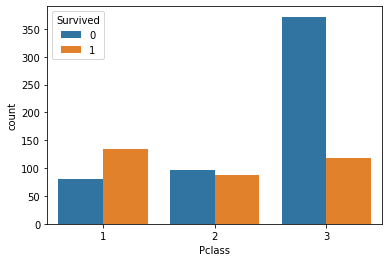

In [ ]:
# #rd passenger class people didnt survive much 
# Passenger one class survived the most followed by 3 and then 2
sns.countplot(x='Pclass',hue='Survived',data=df)

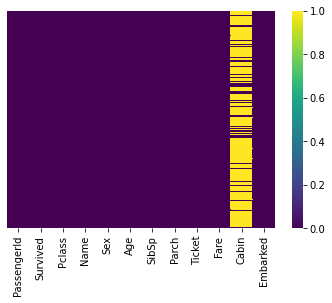

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')

In [ ]:
# Removing the cabin which has many null values
df.drop('Cabin',axis=1,inplace=True)
# Removing the left out null values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
data=df.drop(['Name','Ticket'],axis=1)

In [ ]:
# Getting dummy variables
data=pd.get_dummies(data=data,columns=['Sex','Embarked'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_female   889 non-null    uint8  
 8   Sex_male     889 non-null    uint8  
 9   Embarked_C   889 non-null    uint8  
 10  Embarked_Q   889 non-null    uint8  
 11  Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 99.9 KB


Splittting Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Performing Logistic Regression
model=LogisticRegression()
# Fitting the model
model.fit(X_train,y_train)

# Using the model for predictions

pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Model Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[153  31]
 [ 27  83]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       184
           1       0.73      0.75      0.74       110

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



Preparing test data

In [ ]:
test=pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test["Age"]=test[["Age","Pclass"]].apply(convert2,axis=1)

In [ ]:
test['Fare']=test['Fare'].fillna(value=np.mean(test['Fare']))

In [ ]:
test.drop(['Cabin','Name'],axis=1,inplace=True)

In [ ]:
test=pd.get_dummies(test,columns=['Sex','Embarked'])

In [ ]:
test.drop('Ticket',axis=1,inplace=True)

In [ ]:
predictions=model.predict(test)

In [ ]:
submission=pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=predictions

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
submission.to_csv("SubmissionFinal.csv")